In [1]:
import numpy as np
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
PATH = "Data/"
crime = pd.read_csv(PATH + "crime_2016.csv")
underemployment = pd.read_csv(PATH + "underemployment_2016.csv") 
unemployment = pd.read_csv(PATH + "unemployment_2016.csv")

data = crime.merge(underemployment,how='inner')
data = data.merge(unemployment,how='inner')

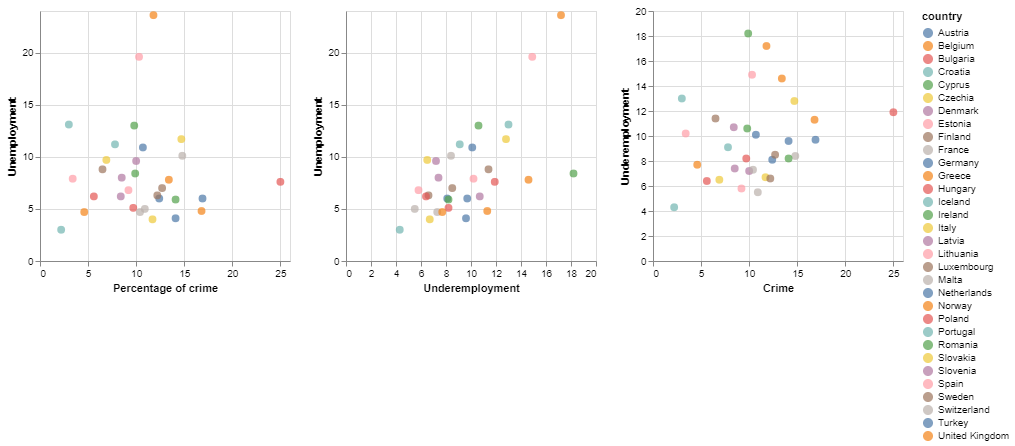

In [21]:
brush = alt.selection(type='interval')

UnEmployment_Crime = alt.Chart(data).mark_circle(size=60).encode(
    x='prct_rpt_crime',
    y='unemp_rate',
    color='country',
    tooltip=['country', 'prct_rpt_crime', 'unemp_rate']
).properties(
    width=250,
    height=250,
    ).add_selection(brush)

UnEmployment_Crime.encoding.x.title = 'Percentage of crime'
UnEmployment_Crime.encoding.y.title = 'Unemployment'

UnEmployment_UnderEmployment = alt.Chart(data).mark_circle(size=60).encode(
    x='med_income_underemp',
    y='unemp_rate',
    color='country',
    tooltip=['country', 'med_income_underemp', 'unemp_rate']
).properties(
    width=250,
    height=250,
    ).add_selection(brush)

UnEmployment_UnderEmployment.encoding.x.title = 'Underemployment'
UnEmployment_UnderEmployment.encoding.y.title = 'Unemployment'

UnderEmployment_Crime = alt.Chart(data).mark_circle(size=60).encode(
    x='prct_rpt_crime',
    y='med_income_underemp',
    color='country',
    tooltip=['country', 'prct_rpt_crime', 'med_income_underemp']
).properties(
    width=250,
    height=250,
    ).add_selection(brush)

UnderEmployment_Crime.encoding.x.title = 'Crime'
UnderEmployment_Crime.encoding.y.title = 'Underemployment'

UnEmployment_Crime | UnEmployment_UnderEmployment | UnderEmployment_Crime